<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/14%EA%B0%95_%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:542: UserWarning: WARN: Overriding environment FrozenLake-v3
  logger.warn(f"Overriding environment {spec.id}")


Success rate: 0.9525
Final Q-Table Values
Left Down Right Up
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


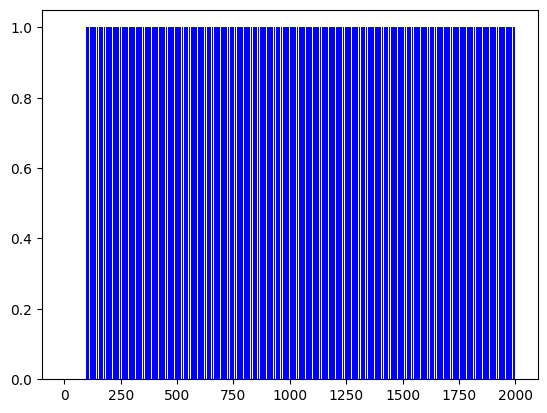

In [2]:
import gym
from gym.envs.registration import register
import matplotlib.pyplot as plt
import numpy as np
import random
#MACROS
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3
def rargmax(vector):  # https://gist.github.com/stober/1943451
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)
# Register FrozenLake with is_slippery False
register(
    id='FrozenLake-v3',
    entry_point="gym.envs.toy_text:FrozenLakeEnv",
    kwargs={'map_name':'4x4','is_slippery':False}
)
env = gym.make("FrozenLake-v3")
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
num_episodes = 2000
# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    # The Q-Table learning algorithm
    while not done:
        action = rargmax(Q[state, :])
        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        # Update Q-table with new knowledge using learning rate
        Q[state][action] = reward + np.max(Q[new_state, :])
        rAll += reward
        state = new_state
    rList.append(rAll)
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("Left Down Right Up")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()